## Tutorial Basics Notes Part 1: Visualizations

(version 2022_01_03)

Table of contents:
1.	[Piano roll display](#A)
2.	[Visualisation of dynamics](#B) 
3.	[Piano score](#C)
4.	[Piano score with chord position symbols and roman numerals](#D)
5.	[Tasks](#E)

In this tutorial we will discuss possibilities for

1.	the visualization of note files and
2.	the automated creation of a piano score and a harmonic designation of a sheet music.

Both areas are presented with music examples andcertain analytical questions followed by an interpretation of the respective results. Working through and following the tutorial should enable you to examine your own music examples (sheet music files) as well as to make comparisons between different pieces of music. 



Every seesion with a Jupyter notebook using the Python library music21 starts with the import of music21 - using this simple command: 

In [1]:
from music21 import * 
# with this command the music21 library will be loaded:
# So click in the cell and then on the button 'Run'!
# This command must ALWAYS be started, 
# when working with a notebook. 


To load a file from the internet, you only have to insert the internet address of the file with the following syntax (red marked URL). The URL can be taken from the sheet music database, e.g. https://analyse.hfm-weimar.de/doku.php?id=en:mowo (mouse right-click on the link: "Copy link address"). We now load the first movement of the String Quartet No. 1, D major, KV 80, by Wolfgang Amadeus Mozart.

In [2]:
mozart = converter.parse('https://analyse.hfm-weimar.de/database/03/MoWo_K155_COM_1-3_StringQuar_003_00842.xml')
# This command sets 'mozart' as the variable name for the sheet music file. 

# You can also save the file on your PC. 
# Then you have to enter your local file path afterwards (e.g. C:/analyse/MoWo_K155_COM_1-3_StringQuar_003_00842.xml)


You can also listen to the piece in the browser – but only in a version with MIDI sounds and when Firefox or Chrome is used as the browser. 

In [3]:
mozart.show('midi')
# If you don't like the MIDI sounds and you want to set other sounds, 
# you have to show these settings in the xml file.
# You can use the command whenever you want to listen to something.  

### 1. Piano roll display <a id='A'></a>

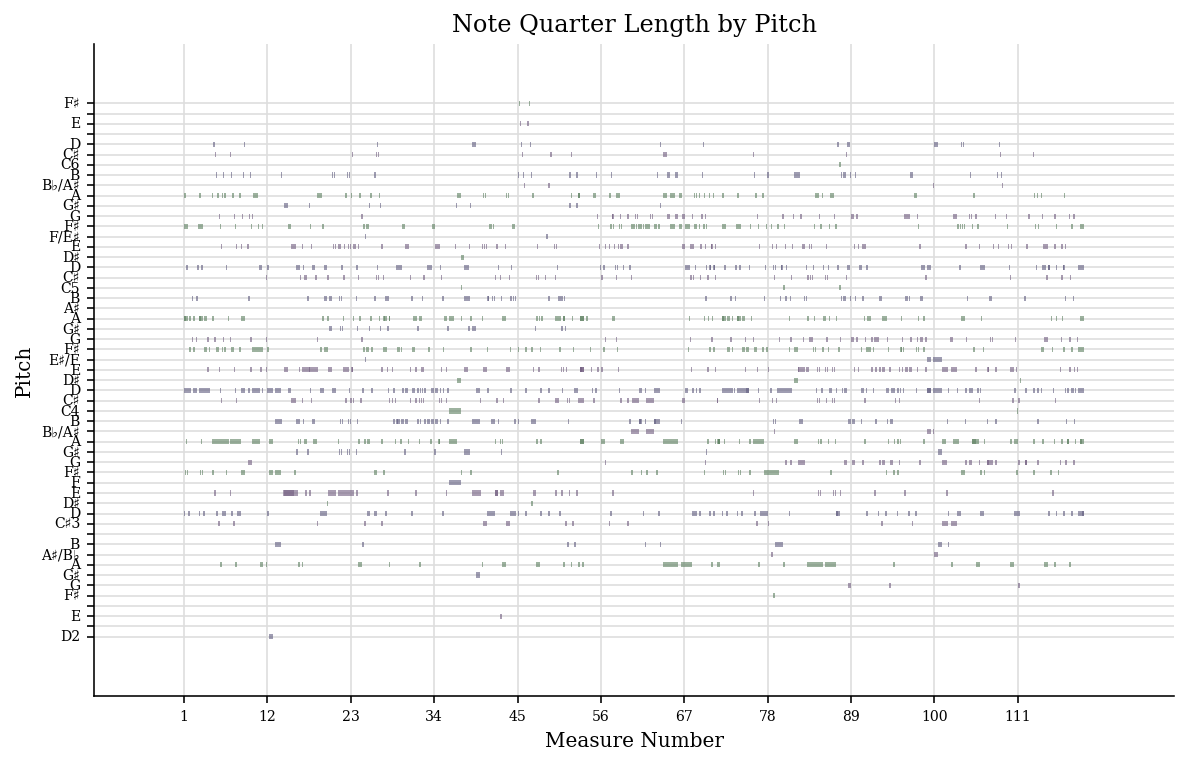

In [4]:
mozart.plot('pianoroll')
# This simple command creates a pianoroll representation within the browser.


What can be seen by this way of display?

To zoom in, you can either select individual sections and bars (see 2.2), or you can activate the MatPlotlib add-on module, which opens a popup window.


In [5]:
%matplotlib
# This command opens all graphical displays (except sheet music) 
# in an extra pop-up window of the python library MatPlotlib
# Additionally the pianoroll command must be repeated: 

mozart.plot('pianoroll')


Using matplotlib backend: Qt5Agg


Select the magnifying glass symbol in the pop-up window. If you now select a section with the mouse, the section will be enlarged. The section can then be moved using the cross symbol.

In [6]:
%matplotlib inline
# This command "turns off" Matplotlib and the graphics appear in the browser again

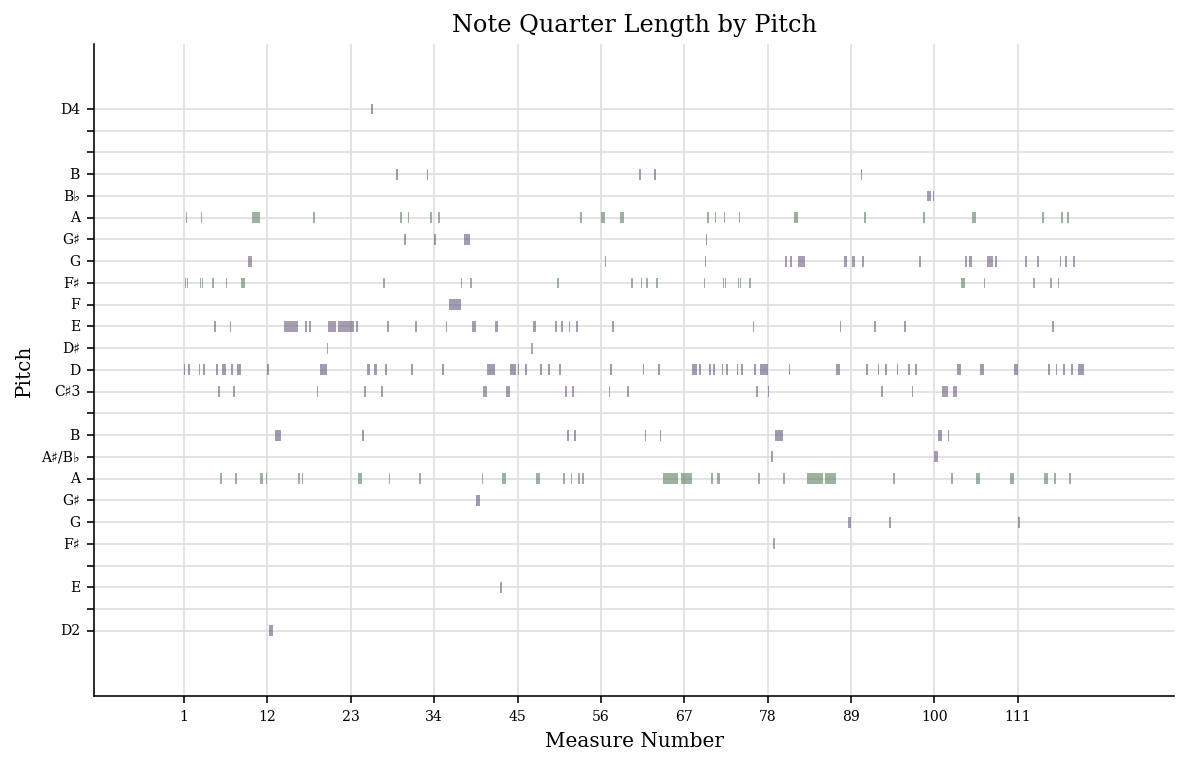

In [7]:
# Of course, you can also have piano rolls represented by the individual voices. 
# For example, from the cello part:

mozart.parts[3].plot('pianoroll')

# You display the other voices by changing the number in the command from 0 - 3.
# First violin = 0
# Second violin = 1
# Viola = 2
# Cello = 3

Note: Piano rolls can also be generated in the Sonic Visualiser. There, the corresponding note files can be listened to simultaneously while the piano roll runs from right to left. 
See: https://analyse.hfm-weimar.de/doku.php?id=sv-pianoroll. 

### 2. Visualization of dynamics <a id='B'></a>

If dynamic are marked in the score file (pp, p, mf, f, ff, etc.), they can be integrated into a visual representation of the parts using the following code. Since this is not the case in the Mozart String Quartet, we load the Ballade in B minor Franz Liszt for this purpose:

In [8]:
liszt = converter.parse('https://analyse.hfm-weimar.de/database/03/LiFra_S171_COM_COM_BalladeNo2_003_00822.xml')
# In order not to overwrite 'mozart' (i.e. the Mozart movement), we choose a new variable 'liszt.

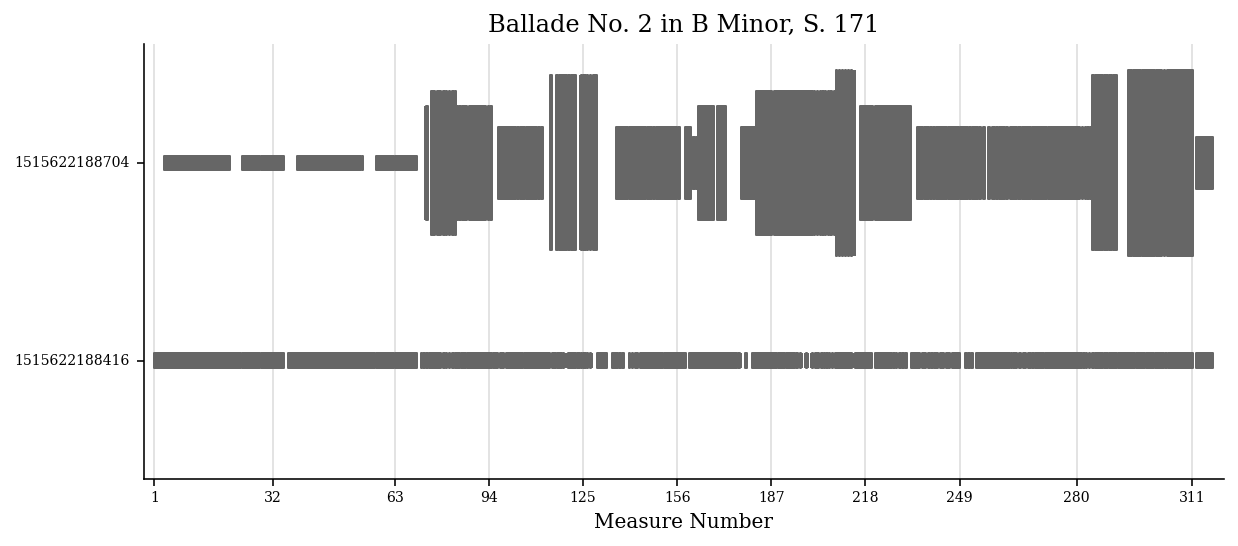

In [9]:
liszt.plot('dolan')

This representation allows you to follow the dynamics of the ballad quite nicely, including rests. Since the dynamic symbols are linked to the staff of the right hand, but refer to the entire sheet music, the left hand is only displayed as a vertical bar. By adding the command '%matplotlib' the graphic can be opened externally

For use in other computer applications (Word, Powerpoint) the graphics (as png file) can of course be exported:

- Right click mouse on the graphic: Save graphic as.

### 3. Piano score <a id='C'></a>

With the Chordify command you can easily create a piano score. Now, we come back to Mozart’s string quartet. 

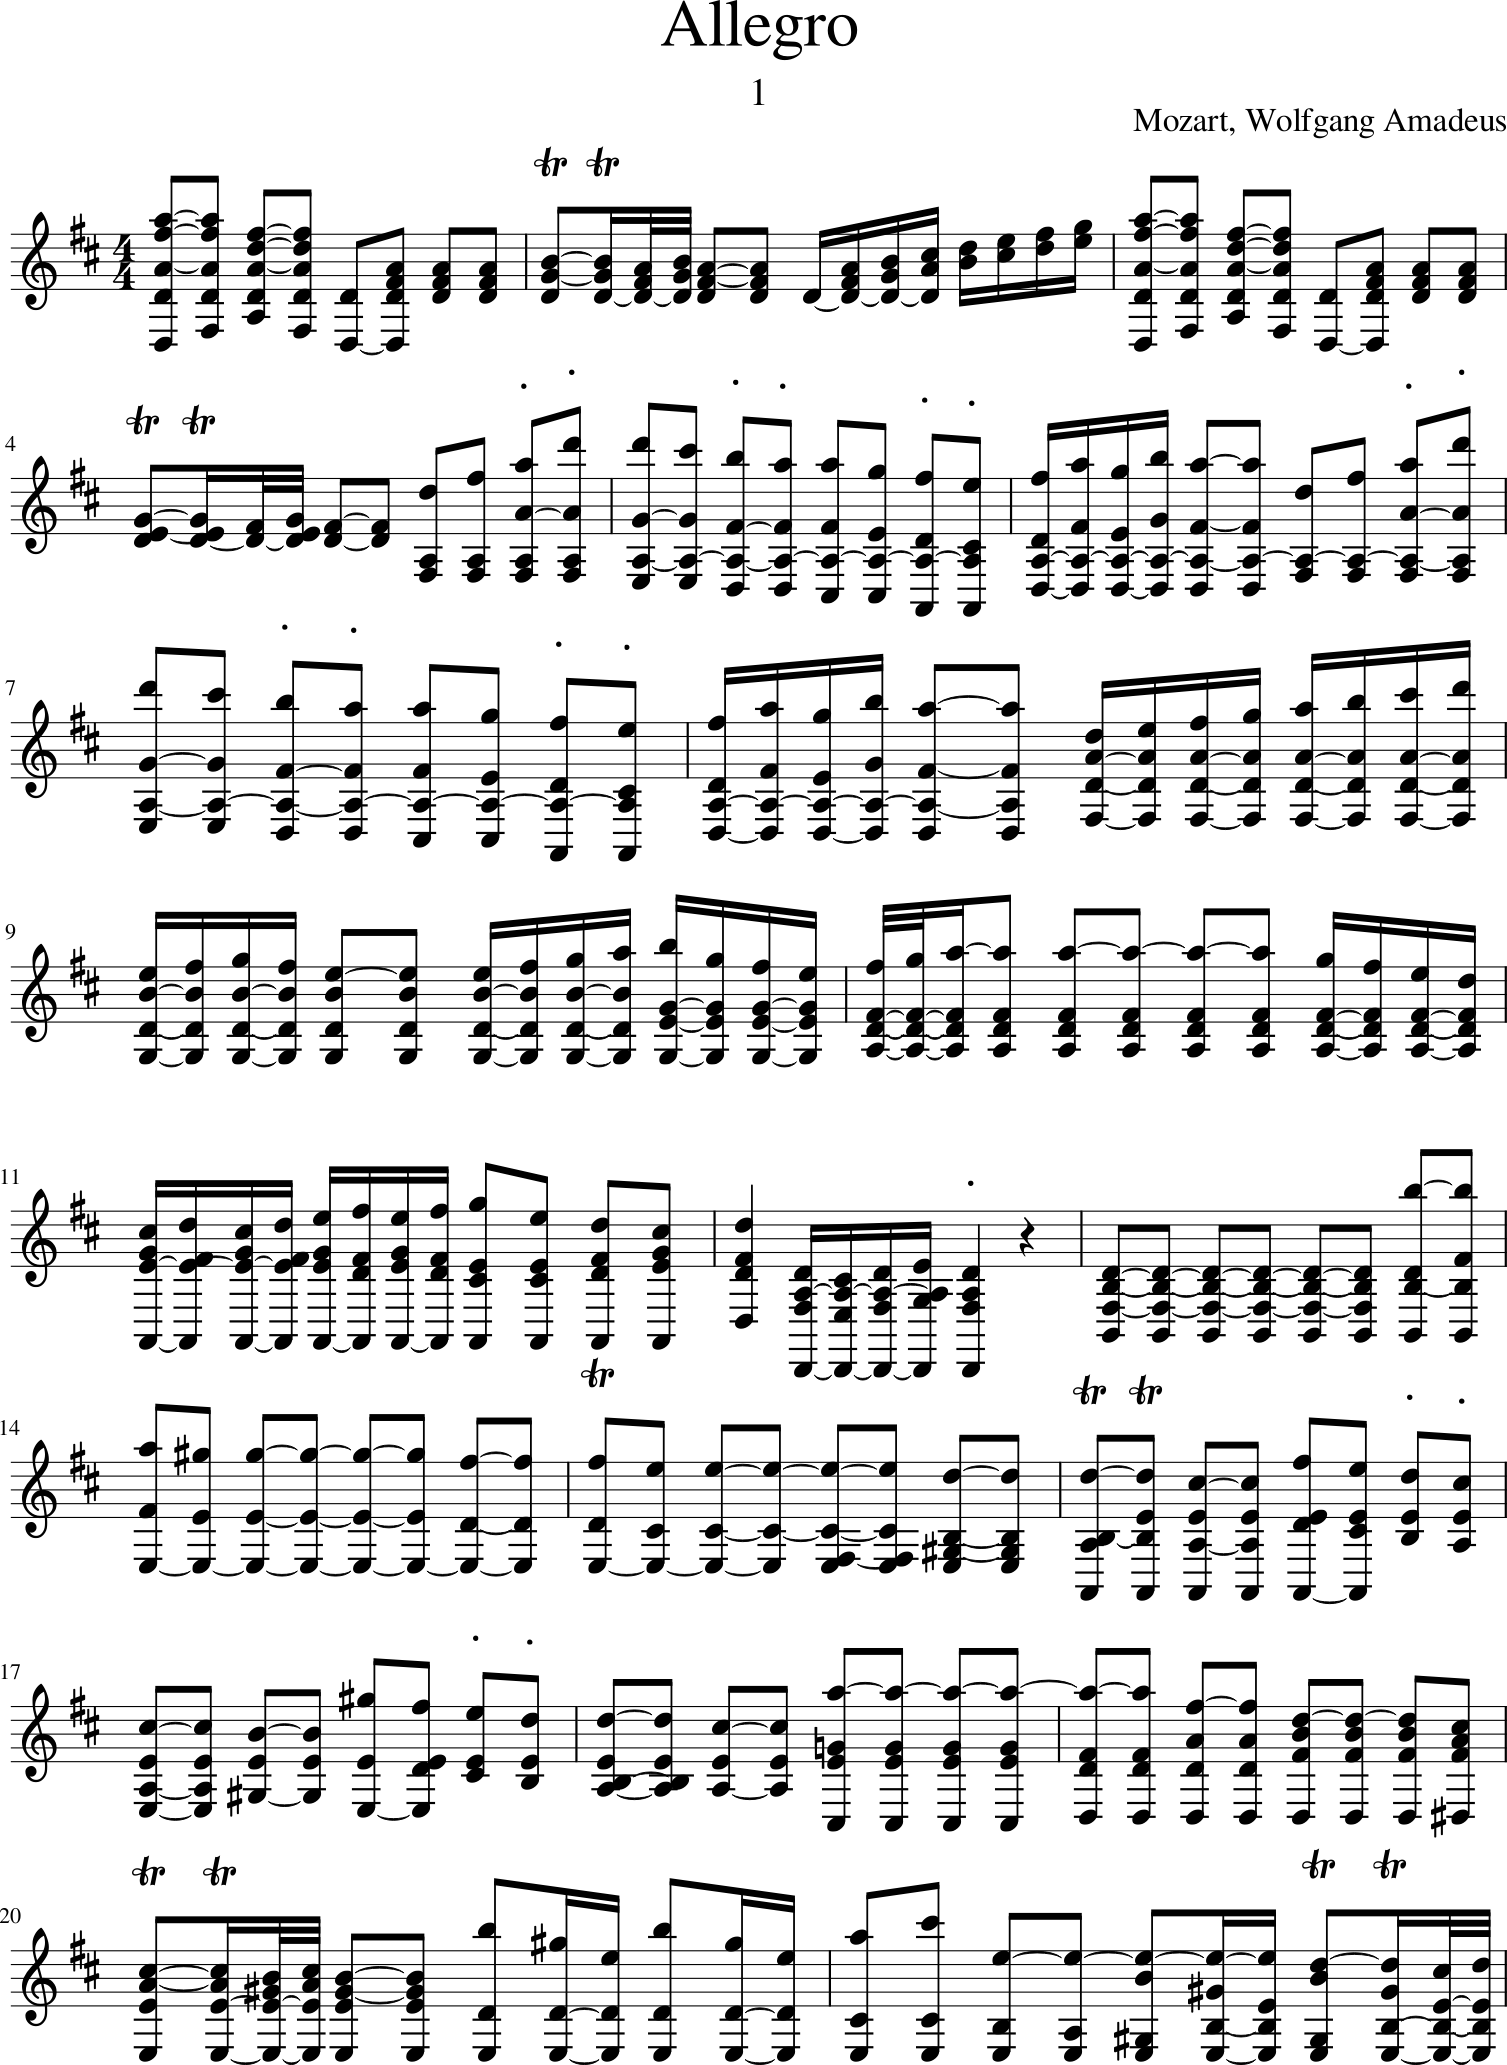

In [10]:
pianoscore = mozart.chordify()
pianoscore.show()
# The chordify command creates a piano score (new variable: 'pianoscore). 
# The piano score can be displayed by the show-command.

In [11]:
pianoscore.write()
# The write command saves the piano score as an xml file, 
# the file name and path is displayed. 
# Alternatively, you can specify your own path and name, see above, e.g.:
# pianoscore.write(fp="D:/Dokumente/mozart_pianoscore.xml")

WindowsPath('C:/users/Martin/Fellowship/music21/tmpcf546mho.xml')

Sometimes it is clearer to distribute the chords over two systems. For this, however, the voice distribution for the upper and lower system must be defined manually.

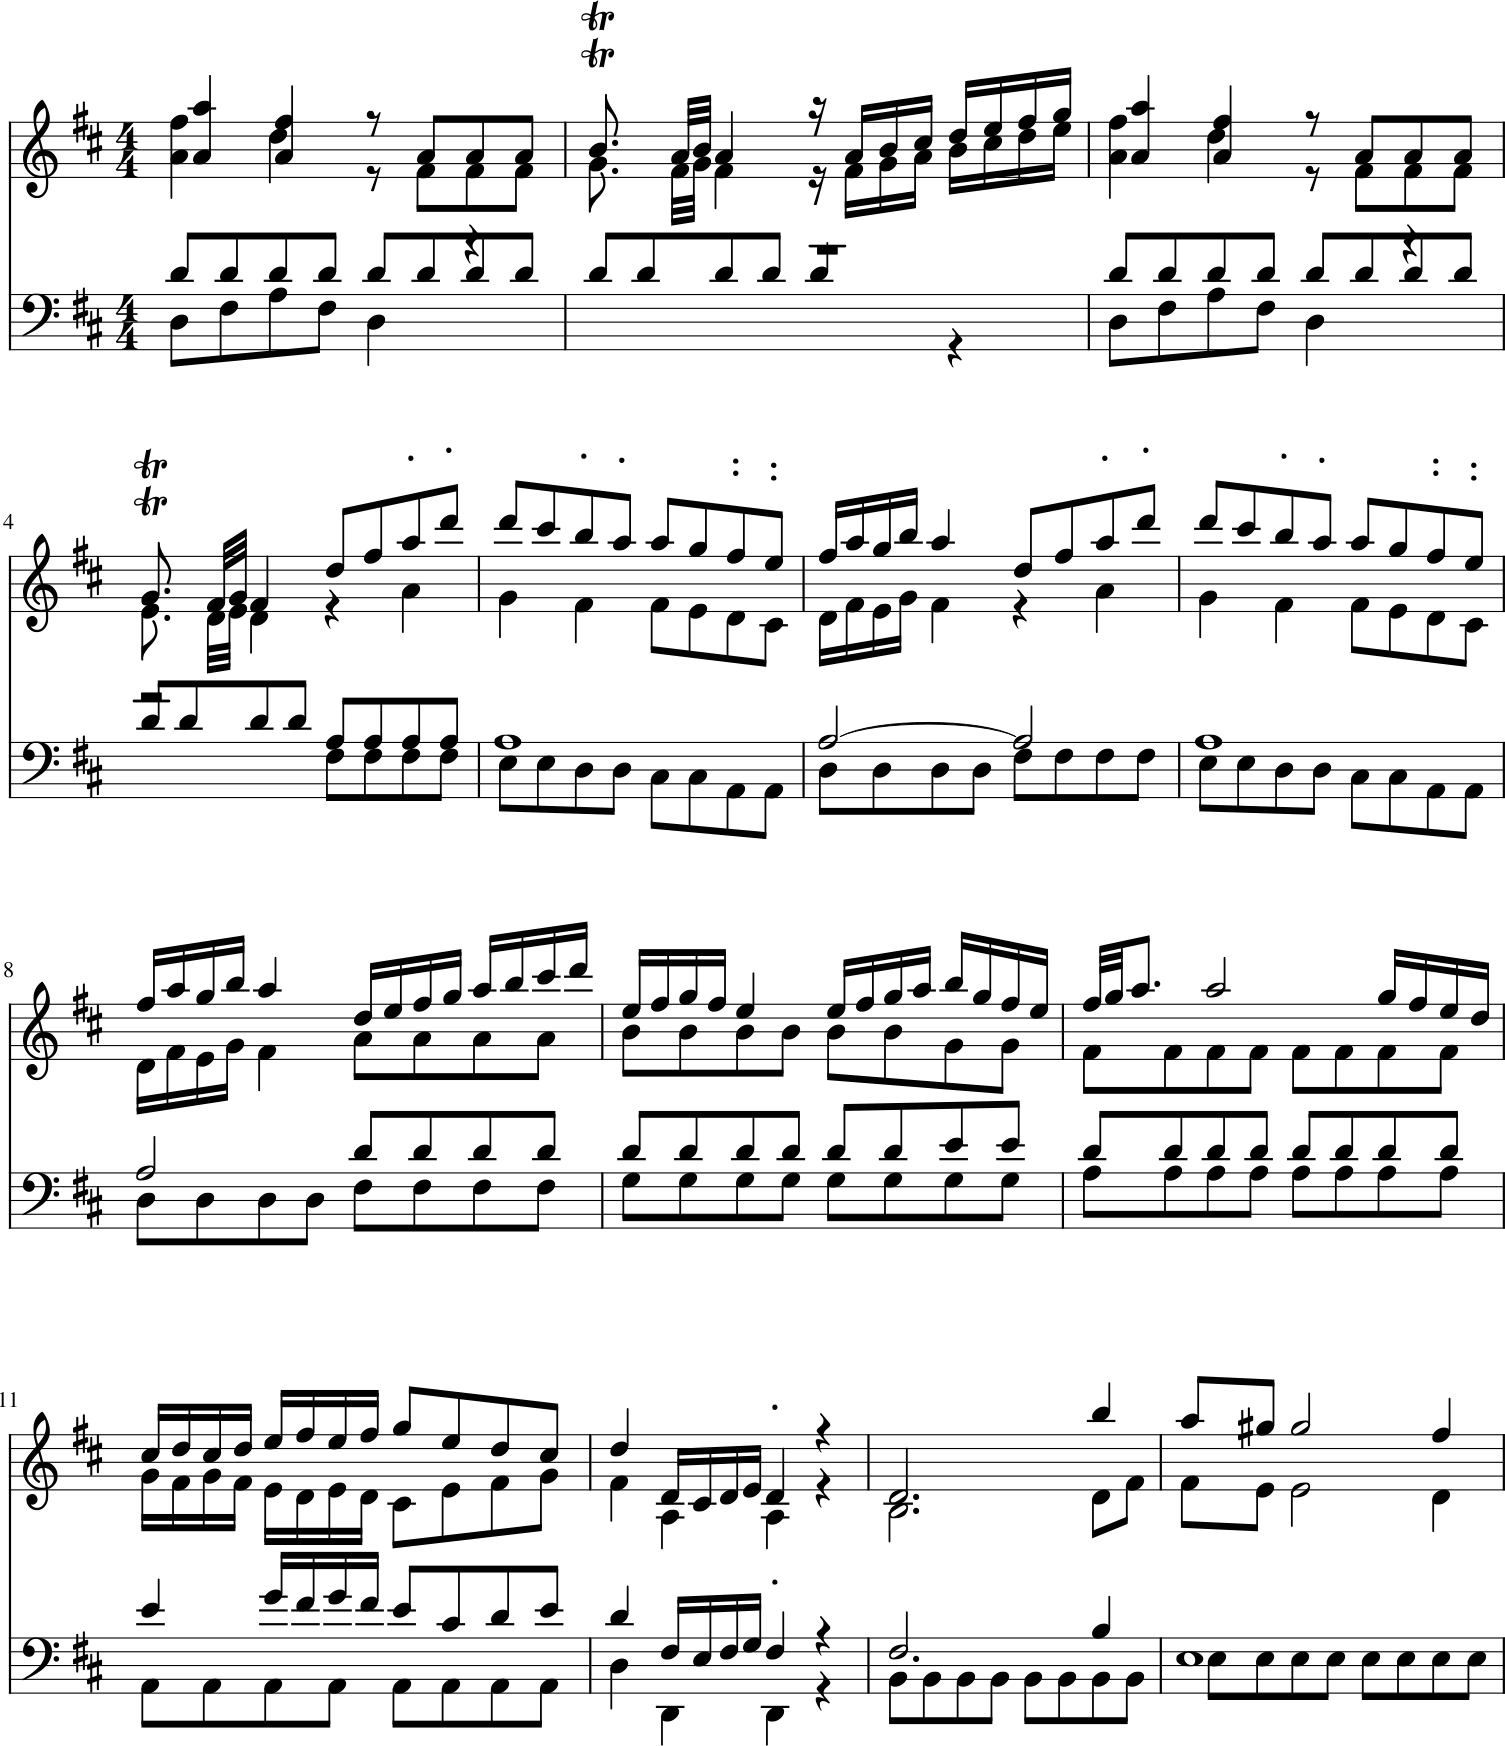

In [12]:
# First, the four voices are named:

Violine1 = mozart.parts[0]
Violine2 = mozart.parts[1]
Viola = mozart.parts[2]
Cello = mozart.parts[3]

# Then a new score is created with the four parts:  
newScore = stream.Score()
newScore.insert(0, Violine1)
newScore.insert(0, Violine2)
newScore.insert(0, Cello)
newScore.insert(0, Viola)
# The cello must be placed before the viola here, so that a bass clef is prefigured. 

pianoscore_new = stream.Opus()
r = newScore.measures(0, len(mozart.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure)))
pianoscore_new.insert(0, r.implode())

NotenV1 = Violine1.recurse().notes
NotenV2 = Violine2.recurse().notes
NotenV = Viola.recurse().notes
NotenC = Cello.recurse().notes

# Finally, the necks of the notes must be turned in the right direction: 
 
for noten in NotenV1:
    noten.stemDirection = 'up'
for noten in NotenV2:
    noten.stemDirection = 'down'    
for noten in NotenV:
    noten.stemDirection = 'up'
for noten in NotenC:
    noten.stemDirection = 'down'
    
pianoscore_new.show()


In [13]:
pianoscore_new.write()
# This piano score can also be saved as an xml file with the write command, 
# the file name and path is displayed.  

WindowsPath('C:/users/Martin/Fellowship/music21/tmpe9j81ps3.xml')

### 4. Piano score with chord position symbols and roman numerals <a id='D'></a>

Music21 offers a possibility to provide a piano reduction with the numbering of the chord position. However, not all voices are taken into account. Nevertheless, this simplified display can be helpful for a harmonic analysis.

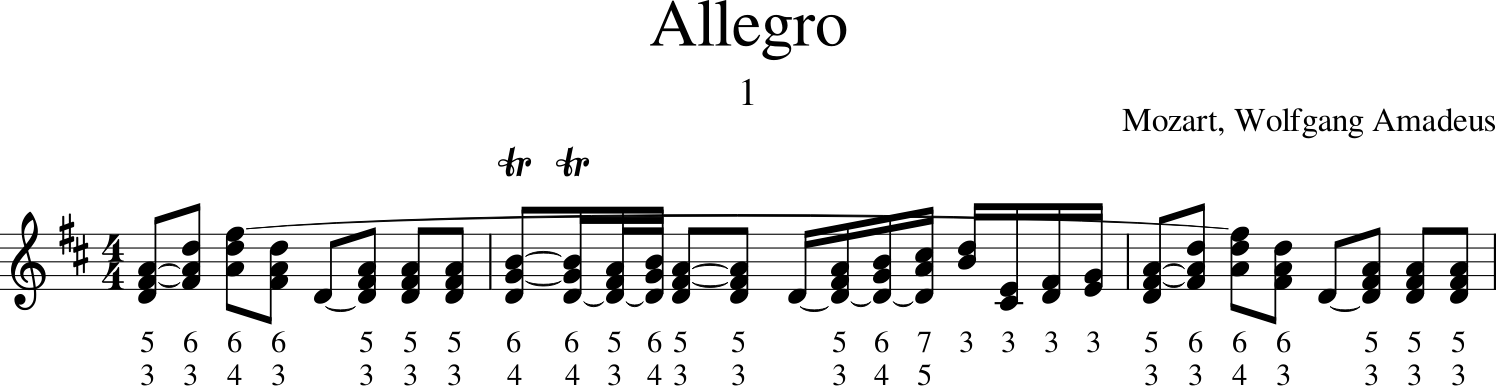

In [14]:
Chordposition = mozart.chordify()
for c in Chordposition.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals()
# The new variable is called 'Chordposition'
    
Chordposition.measures(0, 3).show()
# only the first three bars are displayed. 'Chordposition' is a new variable.


Additionally, music21 offers the possibility of providing a note file with a step numbering. However, the sheet music is only evaluated in a very superficial way, a profound harmonic analysis is not performed. Nevertheless, such a numbering can sometimes be helpful - as a first step towards a real harmonic analysis.

ATTENTION: Step numbering is always based on the root key you specify with the key.Key(' ') command, e.g. 'key.Key('Dm') or 'key.Key('D') for D minor or D major respectively. Modulations and other harmonic movements are not taken into account.

NOTE: Unfortunately, only the piano score in one system ('pianoscore') can be displayed - not the one in two systems ('pianoscore_neu').


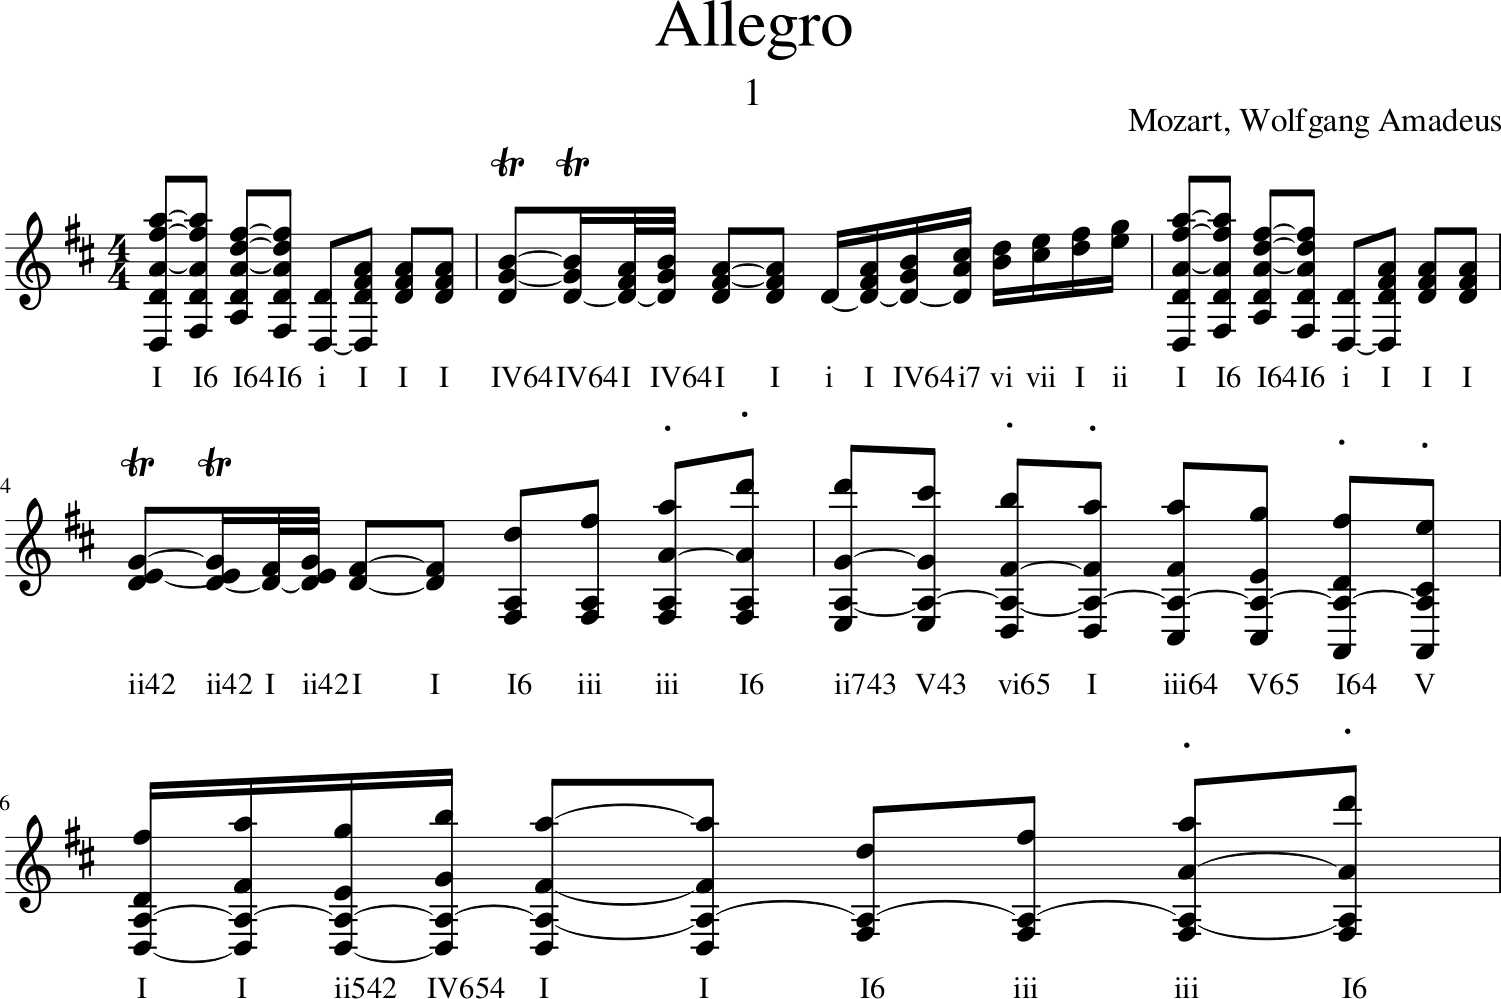

In [15]:
for c in pianoscore.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('D'))
    c.addLyric(str(rn.figure))
# With 'key.Key('D') in the second line we have set the key of D major. # You can also enter another key there on a trial basis, e.g. 'Dm'.
# Accordingly changes the „Stufenbezeichnung“
    
pianoscore.measures(0, 6).show()
# Let us display the first 7 bars.


The chord position view (see above) can of course also be combined with the step name. This view is easier to read:

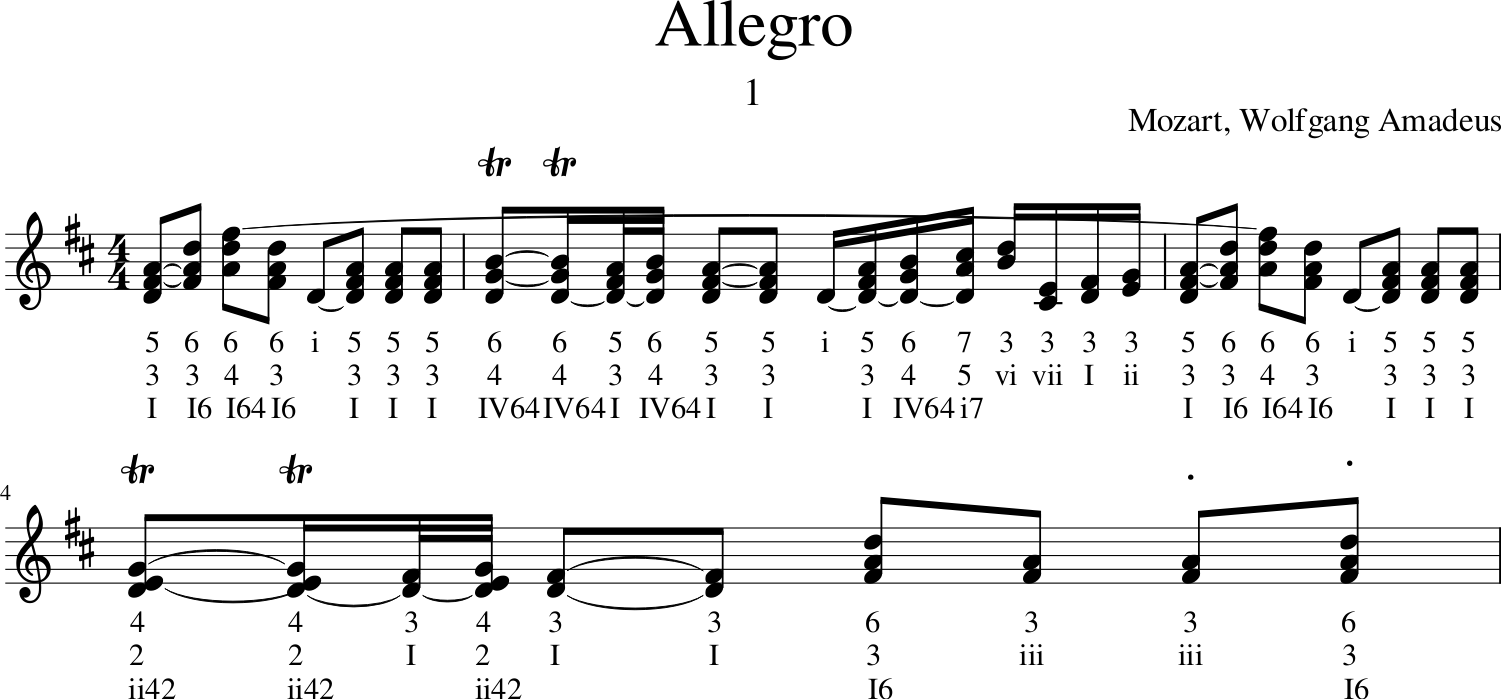

In [16]:
for c in Chordposition.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('D'))
    c.addLyric(str(rn.figure))
    
Chordposition.measures(0, 4).show()


Finally, the somewhat more complex piano reduction of a Haydn symphony:

In [17]:
haydn = converter.parse('https://analyse.hfm-weimar.de/database/03/HayFraJo_HobI99_COM_1-4_LondonSymp_003_00776.xml')
# This command is not necessary if the Haydn symphony has already been loaded (parsed) above. 

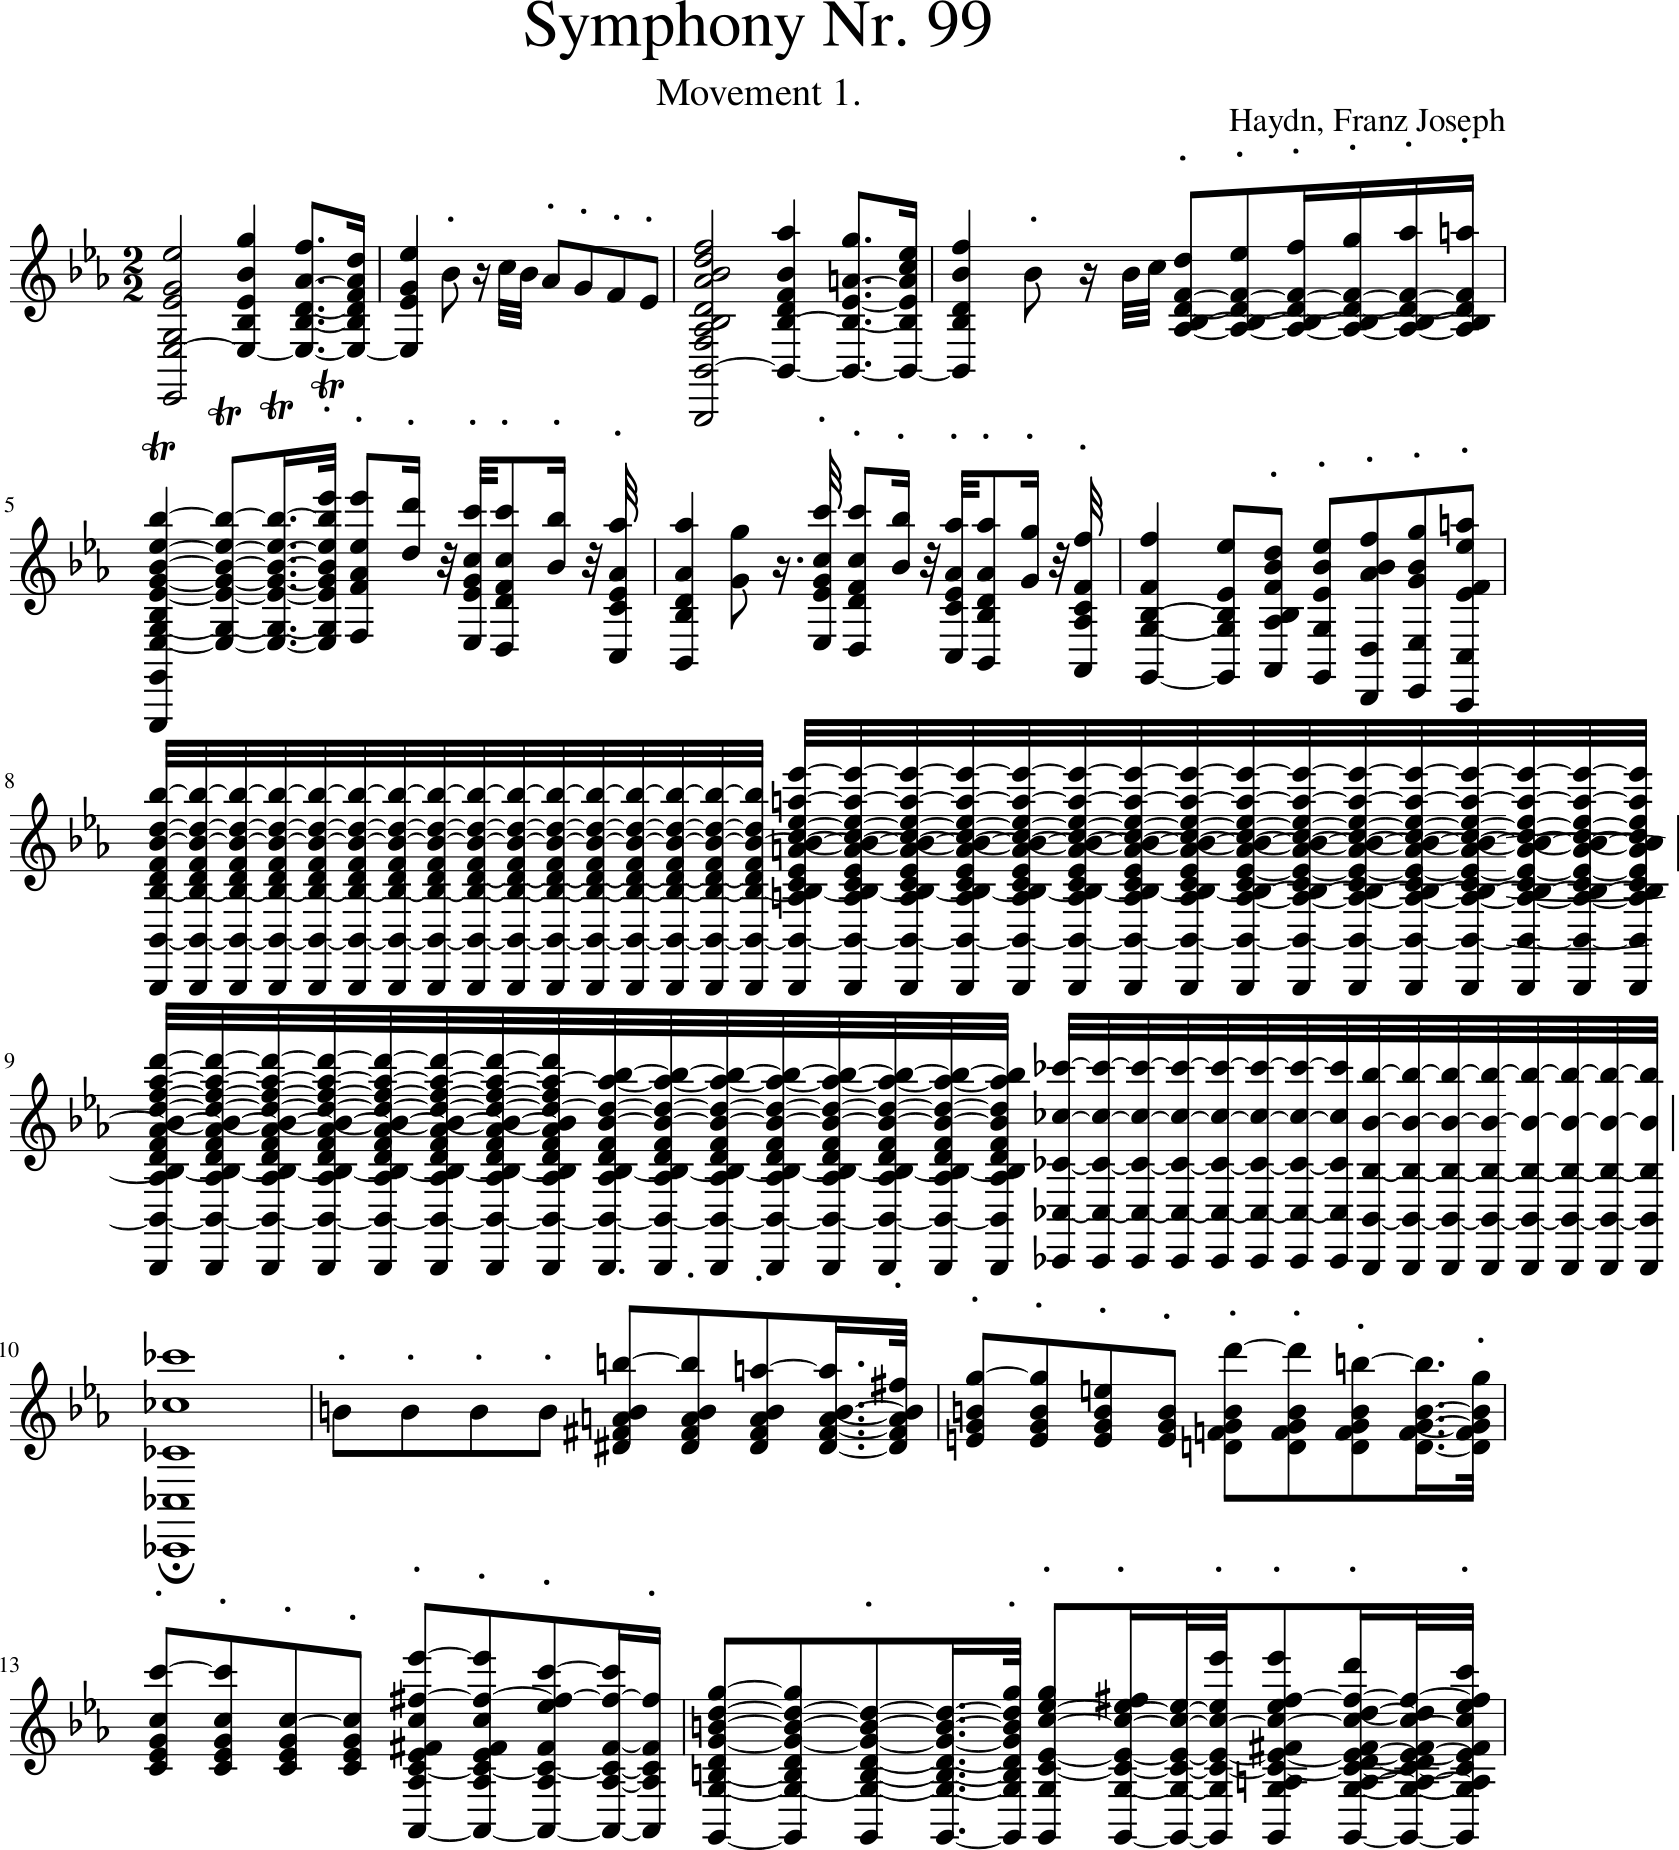

In [18]:
pianoscore = haydn.chordify()
pianoscore.show()

### 5. Tasks <a id='E'></a>

Please, load sheet music files of your own choice from the note archive (https://analyse.hfm-weimar.de/doku.php?id=komponisten). Use these files to test the visualization opportunities presented in this tutorial.